In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import pandas as pd
from custom.functions import *
from typing import Tuple

# Qn 1

### Gini Impurity

In [2]:
q_a = 1 - Rational(8, 18) ** 2 - Rational(5, 18)**2 - Rational(5, 18)**2
q_b = 1 - Rational(6, 10) ** 2 - Rational(4, 10)**2
q_c = 1 - Rational(1, 8)**2 - Rational(5, 8)**2 - Rational(2, 8)**2
print(list(map(lambda x: x.evalf(), [q_a, q_b, q_c]))) 

[0.648148148148148, 0.480000000000000, 0.531250000000000]


In [3]:
overall_gini = 10/18 * q_b + 8/18 * q_c
print(overall_gini)

0.502777777777778


### Entropy

In [4]:
q_a = entropy([8/18, 5/18, 5/18])
q_b = entropy([6/10, 4/10])
q_c = entropy([1/8, 5/8, 2/8])
print(q_a, q_b, q_c)

1.5466316153937778 0.9709505944546686 1.2987949406953985


In [5]:
overall = 10/18 * q_b + 8/18 * q_c
print(overall)

1.116659192783882


### Misclassification Error

In [6]:
q_a = 1 - 8/18
q_b = 1 - 6/10
q_c = 1 - 5/8
print(q_a, q_b, q_c)

0.5555555555555556 0.4 0.375


In [7]:
overall = 10/18 * q_b + 8/18 * q_c
print(overall)

0.3888888888888889


# Question 2

In [8]:
x = np.array([1, 0.8, 2, 2.5, 3, 4, 4.2, 6, 6.3, 7.4, 8, 8.2, 9]).reshape(-1, 1)
y = np.array([2, 3, 2.5, 1, 2.3, 2.8, 1.5, 2.6, 3.5, 4, 3.5, 5, 4.5]).reshape(-1, 1)
data = np.hstack((x, y))


In [9]:
threshold = 5.0
left = data[data[:, 0] < threshold]
right = data[data[:, 0] >= threshold]
left_mean = np.mean(left[:, 1])
right_mean = np.mean(right[:, 1])
mse = (np.sum((left[:, 1] - left_mean) ** 2) + np.sum((right[:, 1] - right_mean) ** 2)) / len(data)
print(mse)

0.5101648351648351


In [10]:
root_mean = np.mean(data[:, 1])
mse = np.sum((data[:, 1] - root_mean) ** 2) / len(data)
print(mse)

1.2223668639053253


# Question 3

In [11]:
df = pd.read_csv("housing.csv")
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [12]:
x = np.array(df.lstat).reshape(-1, 1)
y = np.array(df.medv).reshape(-1, 1)
data = np.hstack((x, y))
data

array([[ 4.98, 24.  ],
       [ 9.14, 21.6 ],
       [ 4.03, 34.7 ],
       ...,
       [ 5.64, 23.9 ],
       [ 6.48, 22.  ],
       [ 7.88, 11.9 ]])

In [13]:
def find_best_split(data: np.ndarray) -> Tuple[int, np.ndarray, np.ndarray]:
    best_mse = np.inf
    best_threshold = None
    best_left = None
    best_right = None
    for i in range(len(data)):
        threshold = data[i, 0]
        left = data[data[:, 0] < threshold]
        right = data[data[:, 0] >= threshold]
        left_mean = np.mean(left[:, 1])
        right_mean = np.mean(right[:, 1])
        mse = (np.sum((left[:, 1] - left_mean) ** 2) + np.sum((right[:, 1] - right_mean) ** 2)) / len(data)
        if mse < best_mse:
            best_mse = mse
            best_threshold = threshold
            best_left = left
            best_right = right
    return best_threshold, best_left, best_right

In [14]:
root_threshold, l, r = find_best_split(data)
l_threshold, ll, lr = find_best_split(l)
r_threshold, rl, rr = find_best_split(r)

ll[:, 1] = np.mean(ll[:, 1])
lr[:, 1] = np.mean(lr[:, 1])
rl[:, 1] = np.mean(rl[:, 1])
rr[:, 1] = np.mean(rr[:, 1])
res = np.concatenate((ll, lr, rl, rr))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [15]:
res[:, 1]

array([39.718     , 39.718     , 39.718     , 39.718     , 39.718     ,
       39.718     , 39.718     , 39.718     , 39.718     , 39.718     ,
       39.718     , 39.718     , 39.718     , 39.718     , 39.718     ,
       39.718     , 39.718     , 39.718     , 39.718     , 39.718     ,
       39.718     , 39.718     , 39.718     , 39.718     , 39.718     ,
       39.718     , 39.718     , 39.718     , 39.718     , 39.718     ,
       39.718     , 39.718     , 39.718     , 39.718     , 39.718     ,
       39.718     , 39.718     , 39.718     , 39.718     , 39.718     ,
       39.718     , 39.718     , 39.718     , 39.718     , 39.718     ,
       39.718     , 39.718     , 39.718     , 39.718     , 39.718     ,
       26.6462963 , 26.6462963 , 26.6462963 , 26.6462963 , 26.6462963 ,
       26.6462963 , 26.6462963 , 26.6462963 , 26.6462963 , 26.6462963 ,
       26.6462963 , 26.6462963 , 26.6462963 , 26.6462963 , 26.6462963 ,
       26.6462963 , 26.6462963 , 26.6462963 , 26.6462963 , 26.64

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [17]:
regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(x, y)

DecisionTreeRegressor(max_depth=2)

In [18]:
regressor.predict(res[:,0, None])

array([39.718     , 39.718     , 39.718     , 39.718     , 39.718     ,
       39.718     , 39.718     , 39.718     , 39.718     , 39.718     ,
       39.718     , 39.718     , 39.718     , 39.718     , 39.718     ,
       39.718     , 39.718     , 39.718     , 39.718     , 39.718     ,
       39.718     , 39.718     , 39.718     , 39.718     , 39.718     ,
       39.718     , 39.718     , 39.718     , 39.718     , 39.718     ,
       39.718     , 39.718     , 39.718     , 39.718     , 39.718     ,
       39.718     , 39.718     , 39.718     , 39.718     , 39.718     ,
       39.718     , 39.718     , 39.718     , 39.718     , 39.718     ,
       39.718     , 39.718     , 39.718     , 39.718     , 39.718     ,
       26.6462963 , 26.6462963 , 26.6462963 , 26.6462963 , 26.6462963 ,
       26.6462963 , 26.6462963 , 26.6462963 , 26.6462963 , 26.6462963 ,
       26.6462963 , 26.6462963 , 26.6462963 , 26.6462963 , 26.6462963 ,
       26.6462963 , 26.6462963 , 26.6462963 , 26.6462963 , 26.64

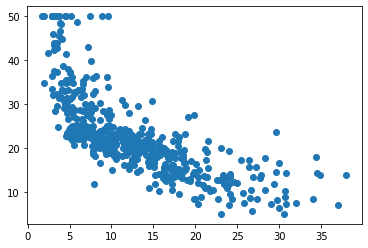

In [19]:
plt.scatter(x, y)

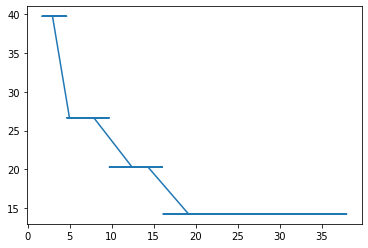

In [20]:
plt.plot(res[:,0].reshape(-1, 1), regressor.predict(res[:,0].reshape(-1, 1)).reshape(-1,1))

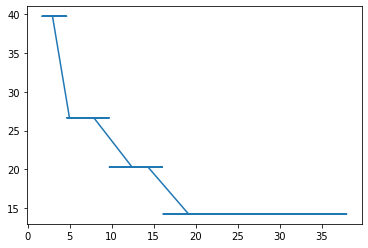

In [21]:
plt.plot(res[:, 0], res[:, 1])

In [22]:
print(regressor.predict(res[:, 0, None]))

[39.718      39.718      39.718      39.718      39.718      39.718
 39.718      39.718      39.718      39.718      39.718      39.718
 39.718      39.718      39.718      39.718      39.718      39.718
 39.718      39.718      39.718      39.718      39.718      39.718
 39.718      39.718      39.718      39.718      39.718      39.718
 39.718      39.718      39.718      39.718      39.718      39.718
 39.718      39.718      39.718      39.718      39.718      39.718
 39.718      39.718      39.718      39.718      39.718      39.718
 39.718      39.718      26.6462963  26.6462963  26.6462963  26.6462963
 26.6462963  26.6462963  26.6462963  26.6462963  26.6462963  26.6462963
 26.6462963  26.6462963  26.6462963  26.6462963  26.6462963  26.6462963
 26.6462963  26.6462963  26.6462963  26.6462963  26.6462963  26.6462963
 26.6462963  26.6462963  26.6462963  26.6462963  26.6462963  26.6462963
 26.6462963  26.6462963  26.6462963  26.6462963  26.6462963  26.6462963
 26.6462963  26.6462963 

In [23]:
print(res[:, 1])

[39.718      39.718      39.718      39.718      39.718      39.718
 39.718      39.718      39.718      39.718      39.718      39.718
 39.718      39.718      39.718      39.718      39.718      39.718
 39.718      39.718      39.718      39.718      39.718      39.718
 39.718      39.718      39.718      39.718      39.718      39.718
 39.718      39.718      39.718      39.718      39.718      39.718
 39.718      39.718      39.718      39.718      39.718      39.718
 39.718      39.718      39.718      39.718      39.718      39.718
 39.718      39.718      26.6462963  26.6462963  26.6462963  26.6462963
 26.6462963  26.6462963  26.6462963  26.6462963  26.6462963  26.6462963
 26.6462963  26.6462963  26.6462963  26.6462963  26.6462963  26.6462963
 26.6462963  26.6462963  26.6462963  26.6462963  26.6462963  26.6462963
 26.6462963  26.6462963  26.6462963  26.6462963  26.6462963  26.6462963
 26.6462963  26.6462963  26.6462963  26.6462963  26.6462963  26.6462963
 26.6462963  26.6462963 

In [24]:
test = DecisionTreeRegressor()
test.fit(x, y)

DecisionTreeRegressor()

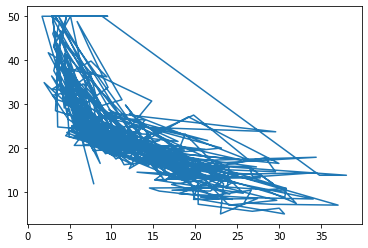

In [25]:
plt.plot(x, test.predict(x))

In [26]:
print(x)

[[ 4.98]
 [ 9.14]
 [ 4.03]
 [ 2.94]
 [ 5.33]
 [ 5.21]
 [12.43]
 [19.15]
 [29.93]
 [17.1 ]
 [20.45]
 [13.27]
 [15.71]
 [ 8.26]
 [10.26]
 [ 8.47]
 [ 6.58]
 [14.67]
 [11.69]
 [11.28]
 [21.02]
 [13.83]
 [18.72]
 [19.88]
 [16.3 ]
 [16.51]
 [14.81]
 [17.28]
 [12.8 ]
 [11.98]
 [22.6 ]
 [13.04]
 [27.71]
 [18.35]
 [20.34]
 [ 9.68]
 [11.41]
 [ 8.77]
 [10.13]
 [ 4.32]
 [ 1.98]
 [ 4.84]
 [ 5.81]
 [ 7.44]
 [ 9.55]
 [10.21]
 [14.15]
 [18.8 ]
 [30.81]
 [16.2 ]
 [13.45]
 [ 9.43]
 [ 5.28]
 [ 8.43]
 [14.8 ]
 [ 4.81]
 [ 5.77]
 [ 3.95]
 [ 6.86]
 [ 9.22]
 [13.15]
 [14.44]
 [ 6.73]
 [ 9.5 ]
 [ 8.05]
 [ 4.67]
 [10.24]
 [ 8.1 ]
 [13.09]
 [ 8.79]
 [ 6.72]
 [ 9.88]
 [ 5.52]
 [ 7.54]
 [ 6.78]
 [ 8.94]
 [11.97]
 [10.27]
 [12.34]
 [ 9.1 ]
 [ 5.29]
 [ 7.22]
 [ 6.72]
 [ 7.51]
 [ 9.62]
 [ 6.53]
 [12.86]
 [ 8.44]
 [ 5.5 ]
 [ 5.7 ]
 [ 8.81]
 [ 8.2 ]
 [ 8.16]
 [ 6.21]
 [10.59]
 [ 6.65]
 [11.34]
 [ 4.21]
 [ 3.57]
 [ 6.19]
 [ 9.42]
 [ 7.67]
 [10.63]
 [13.44]
 [12.33]
 [16.47]
 [18.66]
 [14.09]
 [12.27]
 [15.55]
 [13.  ]
 

In [27]:
x.shape

(506, 1)

In [28]:
res.shape

(506, 2)

In [29]:
res[:, 0].reshape(-1, 1)

array([[ 4.03],
       [ 2.94],
       [ 4.32],
       [ 1.98],
       [ 3.95],
       [ 4.21],
       [ 3.57],
       [ 4.59],
       [ 1.73],
       [ 1.92],
       [ 3.32],
       [ 3.7 ],
       [ 4.45],
       [ 4.56],
       [ 2.87],
       [ 4.38],
       [ 2.97],
       [ 4.08],
       [ 4.56],
       [ 4.45],
       [ 3.11],
       [ 3.81],
       [ 2.88],
       [ 4.14],
       [ 4.63],
       [ 3.13],
       [ 3.92],
       [ 3.76],
       [ 2.47],
       [ 3.95],
       [ 3.59],
       [ 3.53],
       [ 3.54],
       [ 3.11],
       [ 3.16],
       [ 3.53],
       [ 2.98],
       [ 4.16],
       [ 3.76],
       [ 4.59],
       [ 3.01],
       [ 3.16],
       [ 3.33],
       [ 3.56],
       [ 4.54],
       [ 4.61],
       [ 4.5 ],
       [ 3.26],
       [ 3.73],
       [ 2.96],
       [ 4.98],
       [ 9.14],
       [ 5.33],
       [ 5.21],
       [ 8.26],
       [ 8.47],
       [ 6.58],
       [ 9.68],
       [ 8.77],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [

In [30]:
print(res)

[[ 4.03       39.718     ]
 [ 2.94       39.718     ]
 [ 4.32       39.718     ]
 ...
 [18.07       14.26180556]
 [17.6        14.26180556]
 [21.14       14.26180556]]


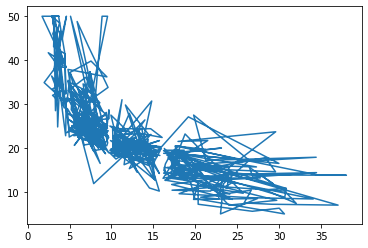

In [31]:
temp = res[:, 0].reshape(-1, 1)
plt.plot(temp, test.predict(temp))

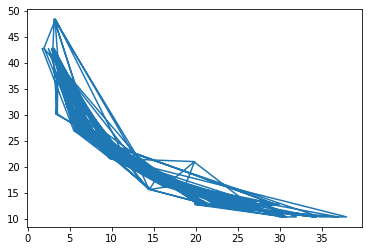

In [32]:
test = DecisionTreeRegressor(max_depth=4)
test.fit(x, y)

plt.plot(x, test.predict(x))
plt.show()

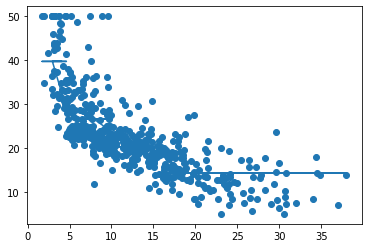

In [33]:
plt.scatter(x, y)
plt.plot(res[:, 0], res[:, 1])
plt.show()

# Question 4

In [34]:
from sklearn.datasets import load_iris

In [35]:
iris = load_iris()
print(iris.keys())
iris.target



dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

In [41]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)

In [44]:
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=4)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
print(classifier.score(x_train, y_train))
print(classifier.score(x_test, y_test))


0.9916666666666667
1.0


[Text(0.5, 0.9, 'x[3] <= 0.8\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]'), Text(0.4230769230769231, 0.7, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'), Text(0.5769230769230769, 0.7, 'x[3] <= 1.75\nentropy = 0.995\nsamples = 81\nvalue = [0, 37, 44]'), Text(0.3076923076923077, 0.5, 'x[2] <= 4.95\nentropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]'), Text(0.15384615384615385, 0.3, 'x[3] <= 1.65\nentropy = 0.187\nsamples = 35\nvalue = [0, 34, 1]'), Text(0.07692307692307693, 0.1, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]'), Text(0.23076923076923078, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'), Text(0.46153846153846156, 0.3, 'x[3] <= 1.55\nentropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]'), Text(0.38461538461538464, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'), Text(0.5384615384615384, 0.1, 'entropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'), Text(0.8461538461538461, 0.5, 'x[2] <= 4.85\nentropy = 0.165\nsamples = 41\nvalue = [0, 1, 40]'), Text(0.7692307

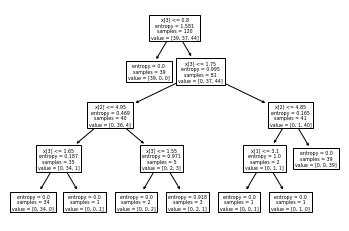

In [57]:
gg = plot_tree(classifier)
# plt.figure(gg, figsize=(19, 12), dpi=300)
# plt.show()
print(gg)